In [643]:
import seaborn as sns
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [667]:
import sklearn
sklearn.__version__

'0.22.1'

In [644]:
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [645]:
df.shape

(891, 15)

In [646]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [647]:
df.drop(['class', 'who', 'deck', 'adult_male', 'fare', 'embark_town'], axis=1, inplace=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,embarked,alive,alone
0,0,3,male,22.0,1,0,S,no,False
1,1,1,female,38.0,1,0,C,yes,False
2,1,3,female,26.0,0,0,S,yes,True
3,1,1,female,35.0,1,0,S,yes,False
4,0,3,male,35.0,0,0,S,no,True


In [652]:
df['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [653]:
df['embarked_cat'] = df['embarked'].fillna('S')
df['embarked_cat'].value_counts()

S    646
C    168
Q     77
Name: embarked_cat, dtype: int64

In [650]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
import numpy as np

In [654]:
ct = make_column_transformer((OneHotEncoder(), ['sex', 'embarked_cat']), (SimpleImputer(strategy='median'), ['age']))
ct.fit_transform(df)

array([[ 0.,  1.,  0.,  0.,  1., 22.],
       [ 1.,  0.,  1.,  0.,  0., 38.],
       [ 1.,  0.,  0.,  0.,  1., 26.],
       ...,
       [ 1.,  0.,  0.,  0.,  1., 28.],
       [ 0.,  1.,  1.,  0.,  0., 26.],
       [ 0.,  1.,  0.,  1.,  0., 32.]])

In [655]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [656]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()

In [657]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(ct,lr)

In [658]:
X = df.drop(['survived'], axis=1)
y = df['survived']

In [659]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, X, y, cv=5, scoring='accuracy').mean()

0.7867365513778168

In [660]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [661]:
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1])

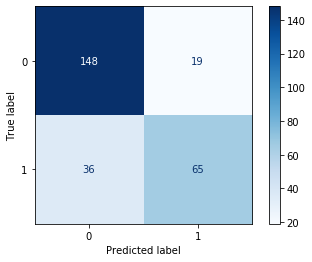

In [662]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(pipe, X_test,y_test, cmap='Blues', values_format='.3g')

In [663]:
disp.confusion_matrix

array([[148,  19],
       [ 36,  65]])

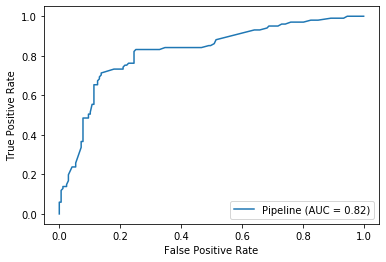

In [665]:
from sklearn.metrics import plot_roc_curve
di = plot_roc_curve(pipe, X_test,y_test)
di

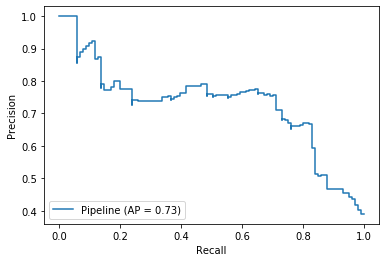

In [666]:
from sklearn.metrics import plot_precision_recall_curve
di = plot_precision_recall_curve(pipe, X_test,y_test)
di